In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
job = pd.read_csv("C:\\Users\\justu\\Downloads\\archive (1)\\Unemployment in India.csv")
job.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
job.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
job.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
filled_df = job.fillna(0)
filled_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df = filled_df.dropna()

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df.shape

(768, 7)

### Time Series Analysis

In [10]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [11]:
# Remove leading and trailing whitespaces from the 'Date' column
df[' Date'] = df[' Date'].str.strip()

In [12]:
# Convert the 'Date' column to datetime format with the specified format
df[' Date'] = pd.to_datetime(df[' Date'], format='%d-%m-%Y')

In [13]:
# Set the 'Date' column as the index of the DataFrame
df.set_index(' Date', inplace=True)

In [14]:
df.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Date,,,,,,
2019-05-31,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural
2019-06-30,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural
2019-07-31,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural
2019-08-31,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural
2019-09-30,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural


### LIne Plot for Time Series Analysis

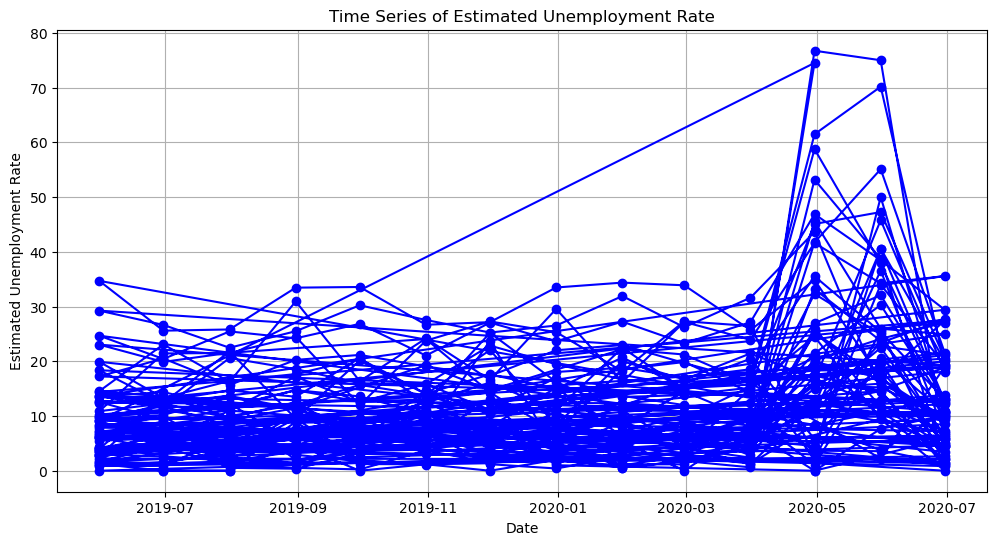

In [15]:
# Plot the time series of Estimated Unemployment Rate
plt.figure(figsize=(12, 6))
plt.plot(df[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Estimated Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.grid(True)
plt.show()

### Comparison across regions

In [16]:
# Group the data by 'Region' and calculate the mean unemployment rate for each region
region_unemployment_mean = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()

In [17]:
region_unemployment_mean

Region
0                    0.000000
Meghalaya            4.798889
Odisha               5.657857
Assam                6.428077
Uttarakhand          6.582963
Gujarat              6.663929
Karnataka            6.676071
Sikkim               7.249412
Madhya Pradesh       7.406429
Andhra Pradesh       7.477143
Maharashtra          7.557500
Telangana            7.737857
West Bengal          8.124643
Chhattisgarh         9.240357
Goa                  9.274167
Tamil Nadu           9.284286
Kerala              10.123929
Puducherry          10.215000
Punjab              12.031071
Uttar Pradesh       12.551429
Rajasthan           14.058214
Chandigarh          15.991667
Jammu & Kashmir     16.188571
Delhi               16.495357
Himachal Pradesh    18.540357
Bihar               18.918214
Jharkhand           20.585000
Haryana             26.283214
Tripura             28.350357
Name:  Estimated Unemployment Rate (%), dtype: float64

#### Bar chart for Regional comparison

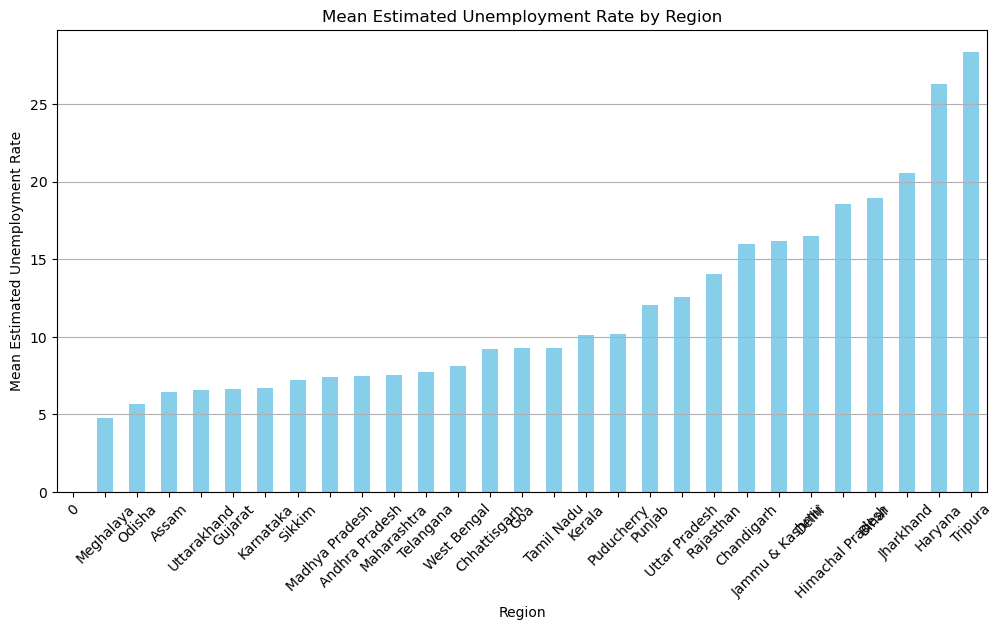

In [18]:
# Plot the bar chart to compare the mean unemployment rates across regions
plt.figure(figsize=(12, 6))
region_unemployment_mean.plot(kind='bar', color='skyblue')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Correlation Matrix

In [19]:
# Convert 'Frequency' column to numeric (assuming it contains numeric values)
df[' Frequency'] = pd.to_numeric(df[' Frequency'], errors='coerce')

In [20]:
# Calculate the correlation matrix
correlation_matrix = df[[' Estimated Unemployment Rate (%)', ' Frequency', ' Estimated Labour Participation Rate (%)']].corr()

In [21]:
print(correlation_matrix)

                                           Estimated Unemployment Rate (%)  \
 Estimated Unemployment Rate (%)                                  1.000000   
 Frequency                                                             NaN   
 Estimated Labour Participation Rate (%)                          0.147447   

                                           Frequency  \
 Estimated Unemployment Rate (%)                 NaN   
 Frequency                                       NaN   
 Estimated Labour Participation Rate (%)         NaN   

                                           Estimated Labour Participation Rate (%)  
 Estimated Unemployment Rate (%)                                          0.147447  
 Frequency                                                                     NaN  
 Estimated Labour Participation Rate (%)                                  1.000000  


### Heatmap for Correlation Analysis

C:\Users\justu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


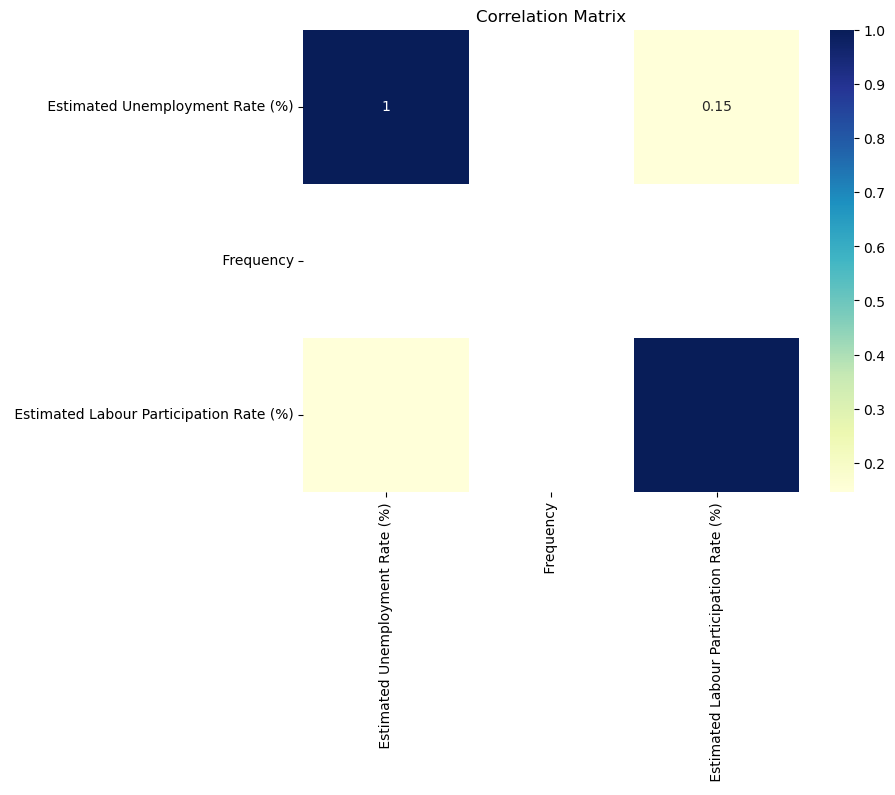

In [22]:
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

### Time Series Forecasting

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

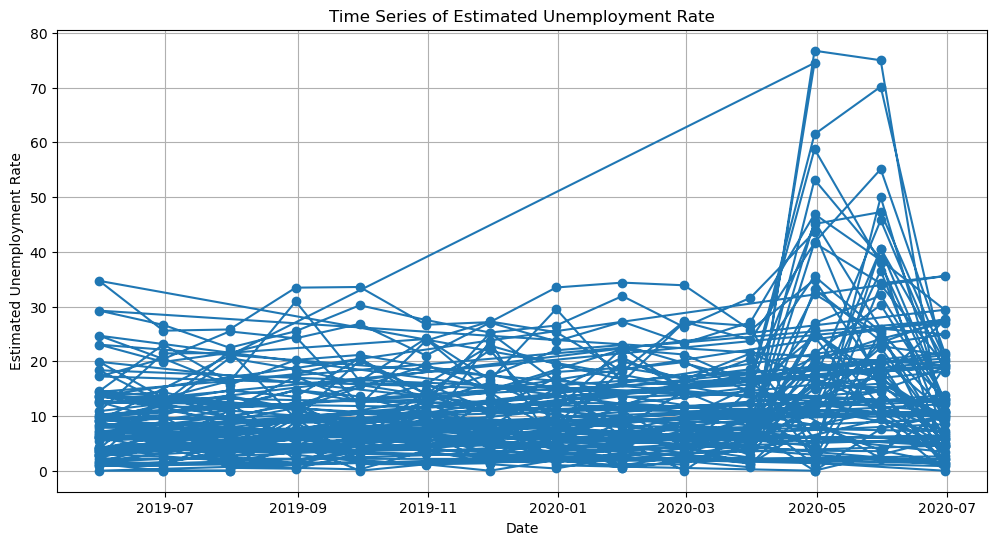

In [25]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Time Series of Estimated Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.grid(True)
plt.show()


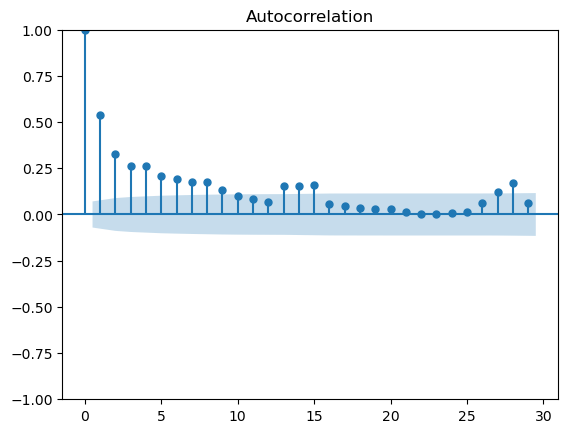

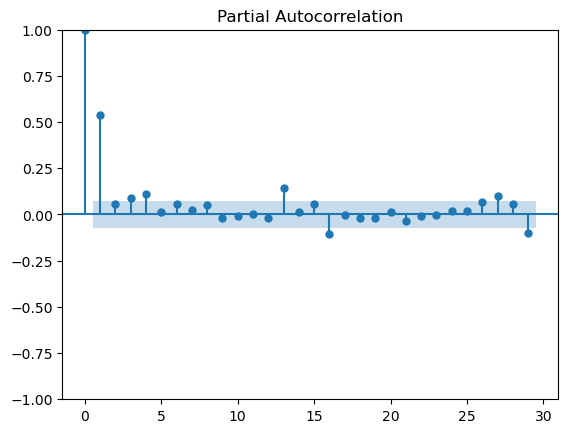

In [26]:
# Plot ACF and PACF to determine ARIMA parameters
plot_acf(df[' Estimated Unemployment Rate (%)'])
plot_pacf(df[' Estimated Unemployment Rate (%)'])
plt.show()

In [28]:
# Fit the ARIMA model
model = ARIMA(df[' Estimated Unemployment Rate (%)'], order=(1, 1, 1))  # Example order, can be adjusted based on ACF and PACF plots
model_fit = model.fit()

C:\Users\justu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\justu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\justu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\justu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\justu\anaconda3\Lib\site-

In [29]:
# Forecast future values
forecast = model_fit.forecast(steps=12)  # Example: forecast 12 months ahead

# Print the forecasted values
print(forecast)

768    2.028129
769    2.904316
770    3.282844
771    3.446375
772    3.517023
773    3.547544
774    3.560730
775    3.566426
776    3.568887
777    3.569950
778    3.570409
779    3.570608
Name: predicted_mean, dtype: float64


C:\Users\justu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\justu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
